# Neyman Orthogonality Proof

$$
y=\alpha D+\beta'W+\epsilon
$$
$$
\overline{y}=y-X'W; \overline{D}=D-X_{n1.1}
$$
Se propone
$$
\overline{y}=a
\overline{D}+u
$$

$$
\alpha = \arg \min_{a \in \mathbb{R}} E[(\overline{y} - a\overline{D})^2] = E[\overline{D}^2]^{-1} - E[\overline{D}y]^2
$$
alpha se puede recuperar de la regresión lineal poblacional de Y o D
$$
a=\overline{\alpha} 
$$ 
resuelve la ecuación:
$$
E(\overline{y}-a\overline{D})\overline{D}=0
$$
Entonces, si tenemos una muestra aleatoria,
$$
(y_i,x_i)^\eta_{i=1}
$$
debemos imitar el procedimiento de partición en la población.

## NEYMAN ORTHOGONALITY

alpha : parametro obejtivo
eta: parámetros de proyección con valor real
$$
\eta°=(\delta'_{DW}, \delta'_{YW})'
$$
$$
\alpha=\alpha(\eta)
$$
por el IMPLICIT FUNCTION THEOREM
$$
D=\partial a M(\alpha,\eta°)^{-1} \partial \eta M(\alpha,\eta°)
$$
y
$$
\partial \eta_{1} M(\alpha, \eta°)=E(W \overline{D})=0
$$
$$
\partial \eta_{2} M(\alpha, \eta°)=-E(W\overline{y})+2E(\alpha W \overline{D})=0
$$
usando ITF
$$
\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]da+\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]d\eta=0
$$
$$
\frac{da}{d\eta} = \left(-\left[\frac{\partial M}{\partial a}(a, \eta_0)\right]^{-1} \left[\frac{\partial M}{\partial \eta}(a, \eta°)\right]\right)
$$
$$
\left[\frac{\partial M}{\partial \eta}(\alpha, \eta_0)\right]=\left[\frac{\partial M}{\partial \eta_1}(\alpha, \eta_0)\right]+\left[\frac{\partial M}{\partial \eta_2}(\alpha, \eta_0)\right]
$$
$$
\left[\frac{\partial M}{\partial \eta}(\alpha, \eta_0)\right]=\left[\frac{\partial M}{\partial \eta_1}(\alpha, \delta'_{yW}, \delta'_{DW})\right]+\left[\frac{\partial M}{\partial \eta_2}(\alpha, \delta'_{yW}, \delta'_{DW})\right]
$$
## Para S1:
$$
\frac{\partial M}{\partial \eta_1}(\alpha, \delta'_{yW}, \delta'_{DW})
$$


$$
S_1 = \frac{\partial M}{\partial \eta_1} \bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1=\frac{\partial E[[\overline y(\eta_1)-\overline{D}(\eta_2)]\overline{D}(\eta_2)]}{\partial \eta_1}
$$
$$
S_1=\frac{\partial E[\overline y(\eta_1)\overline{D}(\eta_2)]}{\partial \eta_1}
$$
y
$$
\overline y(\eta_1)=y-\eta_1W
$$
$$
S_1 = E[(W)\overline{D}(\eta _2)]\bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1 = E[(W)(D - \eta _2)]\bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$
$$
S_1 = E[(W)(D-\delta'_{DW}W)]
$$
$$
S_1 = E[wD-\delta'_{DW}W]
$$
$$
S_1 = E[WD-W[(W'W)^{-1}(W'D)]'W]
$$
$$
S_1 = E[WD-WD]=0
$$

## Ahora en cuanto a S2:
$$
S_2 = \frac{\partial M}{\partial \eta_2} \bigg|_{(\alpha, \delta'_{yW},\delta'_{DW})}
$$

$$
S_2 = -E[W\overline{y}]+2E[\alpha W\overline{D}] = 0
$$

Desarrollamos cada término usando las definiciones
$$ 
( \overline{y} = y - \eta_1 W )
$$ y 
$$
( \overline{D} = D - \eta_2 W )
$$
Primer Término: 
$$
( -E[W\overline{y}])
$$
$$
\overline{y} = y - \eta_1 W \implies -E[W\overline{y}] = -E[W(y - \eta_1 W)]
$$

Expandimos el producto dentro de la esperanza:

$$
-E[W\overline{y}] = -E[W y] + E[\eta_1 W^2]
$$

Donde 
$$
(\eta_1 = (\delta'_{yW})')
$$ tenemos:

$$
-E[W\overline{y}] = -E[W y] + (\delta'_{yW})' E[W^2]
$$

Segundo Término:
$$
( 2E[\alpha W\overline{D}])
$$

$$
\overline{D} = D - \eta_2 W \implies 2E[\alpha W\overline{D}] = 2E[\alpha W(D - \eta_2 W)]
$$

Expandimos el producto dentro de la esperanza:

$$
2E[\alpha W\overline{D}] = 2\alpha E[WD] - 2\alpha \eta_2 E[W^2]
$$

Donde 
$$
(\eta_2 = \delta'_{DW})
$$tenemos:

$$
2E[\alpha W\overline{D}] = 2\alpha E[WD] - 2\alpha (\delta'_{DW})' E[W^2]
$$

Sumando ambos para S2

$$
S_2 = -E[W y] + (\delta'_{yW})' E[W^2] + 2\alpha E[WD] - 2\alpha (\delta'_{DW})' E[W^2] = 0
$$
como
$$
S_2 =-E[W\overline{y}]+2E[\alpha W\overline{D}]=0
$$

# Code section

## Orthogonal learning

### Simulation Design

In [1]:
#!pip install multiprocess
#!pip install pyreadr
#!git clone https://github.com/maxhuppertz/hdmpy

In [2]:
import hdmpy
import numpy as np
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

### Simulation Design 1

In [3]:
# Set seed
np.random.seed(0)
B = 100
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

In [4]:
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = 10 * D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

In [5]:
for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

In [6]:
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

Text(0.5, 0, 'Naive - True')

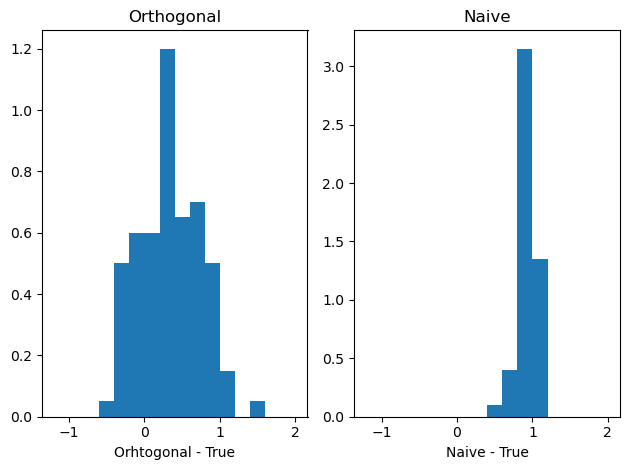

In [7]:
fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 1, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

Text(0.5, 0, 'Naive - True')

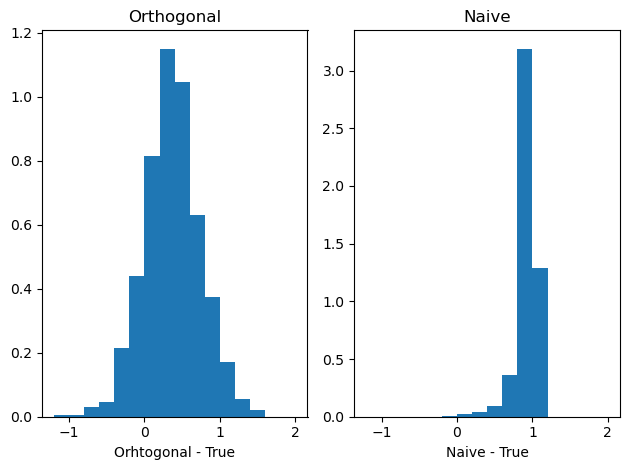

In [8]:
# b = 1000
np.random.seed(0)
B = 1000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]
    
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 1, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

In [ ]:
# b = 10000
np.random.seed(0)
B = 10000
Naive = np.zeros( B )
Orthogonal = np.zeros( B )

n = 100
p = 100
beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

mean = 0
sd = 1
X = np.random.normal( mean , sd, n * p ).reshape( n, p )

D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
# DGP 
Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

# single selection method
r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

for i in range( 0, B ):
    n = 100
    p = 100
    beta = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )
    gamma = ( 1 / (np.arange( 1, p + 1 ) ** 2 ) ).reshape( p , 1 )

    mean = 0
    sd = 1
    X = np.random.normal( mean , sd, n * p ).reshape( n, p )

    D = ( X @ gamma ) + np.random.normal( mean , sd, n ).reshape( n, 1 )/4 # We reshape because in r when we sum a vecto with a matrix it sum by column
    
    # DGP 
    Y = D + ( X @ beta ) + np.random.normal( mean , sd, n ).reshape( n, 1 )

    # single selection method
    r_lasso_estimation = hdmpy.rlasso( np.concatenate( ( D , X ) , axis  =  1 ) , Y , post = True ) # Regress main equation by lasso

    coef_array = r_lasso_estimation.est[ 'coefficients' ].iloc[ 2:, :].to_numpy()    # Get "X" coefficients 

    SX_IDs = np.where( coef_array != 0 )[0]

    # In case all X coefficients are zero, then regress Y on D
    if sum(SX_IDs) == 0 : 
        Naive[ i ] = sm.OLS( Y , sm.add_constant(D) ).fit().summary2().tables[1].round(3).iloc[ 1, 0 ] 

    # Otherwise, then regress Y on X and D (but only in the selected coefficients)
    elif sum( SX_IDs ) > 0 :
        X_D = np.concatenate( ( D, X[:, SX_IDs ] ) , axis = 1 )
        Naive[ i ] = sm.OLS( Y , sm.add_constant( X_D ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]

    # In both cases we save D coefficient
        
    # Regress residuals. 
    resY = hdmpy.rlasso( X , Y , post = False ).est[ 'residuals' ]
    resD = hdmpy.rlasso( X , D , post = False ).est[ 'residuals' ]
    Orthogonal[ i ] = sm.OLS( resY , sm.add_constant( resD ) ).fit().summary2().tables[1].round(3).iloc[ 1, 0]
    
Orto_breaks = [-1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
Naive_breaks = [-0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2]

fig, axs = plt.subplots(1, 2, sharex= True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist( Orthogonal - 1 , range = (-2, 2), density = True , bins = Orto_breaks )
axs[1].hist( Naive - 1, range = (-2, 2), density = True , bins = Naive_breaks )

axs[0].title.set_text('Orthogonal')
axs[1].title.set_text('Naive')

axs[0].set_xlabel( 'Orhtogonal - True' )
axs[1].set_xlabel( 'Naive - True' )

### Explain what you observe in the distribution of the histograms. Where the orthogonal and Naive should be centered?

The histogram for the "orthogonal" method is more tightly clustered around 0, while the one for the "naive" method is more spread out and centered around 0.5. This difference becomes more noticeable with larger values of B. Ideally, both histograms should be centered around 0, indicating that the estimated coefficients are closer to the true values.

### Why does this happen?

The "orthogonal" approach employs techniques such as residualization, where the outcome variable is regressed on covariates to obtain residuals, and then these residuals are regressed on another set of covariates. This procedure aims to make the residuals orthogonal to certain variables of interest, effectively addressing issues like omitted variable biases and endogeneity. 

### Explain why using parallel computing, the running time is lower. 

Parallel computing harnesses the power of multiple CPU cores to handle several tasks simultaneously, which speeds up processing. Instead of waiting for each task to finish before starting the next one, the system starts new tasks right away. This approach is especially handy for big loops, like the example provided, as it helps save time by efficiently using available resources. Nevertheless, this could also cause some problems in local variables, making the loop give errors.

## Double Lasso using school data R

In [4]:
import numpy as np
import pandas as pd

In [10]:
# Data
data = pd.read_csv('C:/Users/jeffr/Downloads/bruhn2016.csv')
data

In [ ]:
data.info()

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.api import OLS, add_constant

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [ ]:
import sys
sys.path.insert(1, "./hdmpy")
import hdmpy

In [ ]:
!pip install multiprocess
!pip install pyreadr
!git clone https://github.com/maxhuppertz/hdmpy.git

### OLS regression

In [ ]:
data.columns = data.columns.str.replace('.', '_')

# Corrected formula with underscores instead of periods
flex = 'outcome_test_score ~ treatment + is_female + mother_attended_secondary_school + father_attened_secondary_school + family_receives_cash_transfer + has_computer_with_internet_at_home + has_some_form_of_income'

# Fit the OLS model
ols_model = smf.ols(formula=flex, data=data).fit()


coef = ols_model.params
std_error = ols_model.bse
conf_int = ols_model.conf_int().T


table_ols_pd = pd.DataFrame({
    'Coefficient': coef,
    'Std. Error': std_error,
    'Conf. Interval Lower': conf_int.loc[0],
    'Conf. Interval Upper': conf_int.loc[1]
})

table_ols_pd

### Double Lasso using cross-validation

In [ ]:
data.dropna(axis=0, inplace=True)
data.reset_index(inplace=True ,drop=True)

In [ ]:
y = data['outcome_test_score']
x = data['treatment']
z = data[['is_female','mother_attended_secondary_school','father_attened_secondary_school','family_receives_cash_transfer','has_computer_with_internet_at_home','has_some_form_of_income']] 

lasso_y_z = LassoCV(cv=10).fit(z, y)
lasso_x_z = LassoCV(cv=10).fit(z, x)

zy_res = y - lasso_y_z.predict(z)
zx_res = x - lasso_x_z.predict(z)

In [ ]:
ols_model = OLS(zy_res, zx_res).fit()
coef = ols_model.params['treatment']
conf_int = ols_model.conf_int().loc['treatment']
std_error = ols_model.bse['treatment']


table_DLCV_pd = pd.DataFrame({
    'Coefficient': [coef],
    'Std. Error': [std_error],
    'Conf. Interval Lower': [conf_int[0]],
    'Conf. Interval Upper': [conf_int[1]]
})

table_DLCV_pd

### Double lasso using theoretical lambda

In [ ]:
lambda_ = 0.5

lasso_yz = Lasso(alpha=lambda_).fit(z, y)
lasso_xz = Lasso(alpha=lambda_).fit(z, x)

zy_resi = y- lasso_yz.predict(z)
zx_resi = x- lasso_xz.predict(z)

ols_model = OLS(zy_resi, zx_resi).fit()
coef = ols_model.params['treatment']
conf_int = ols_model.conf_int().loc['treatment']
std_error = ols_model.bse['treatment']

table_DLambda_pd = pd.DataFrame({
    'Coefficient': [coef],
    'Std. Error': [std_error],
    'Conf. Interval Lower': [conf_int[0]],
    'Conf. Interval Upper': [conf_int[1]]
})

table_DLambda_pd

### Double Lasso using method = “partialling out”

In [ ]:
lasso_direct = hdmpy.rlassoEffect(x=x, y=y, d=z, method="partialling out") 
lasso_direct

lasso_direct['alpha']

est_lasso_hdm = lasso_direct['alpha']
std_lasso_hdm = lasso_direct["se"]
lower_ci_lasso_hdm = est_lasso - 1.96*std_lasso
upper_ci_lasso_hdm = est_lasso + 1.96*std_lasso

table_DLPO = np.zeros( (1, 4) )

table_DLPO[0,0] = est_lasso_hdm   
table_DLPO[0,1] = std_lasso_hdm    
table_DLPO[0,2] = lower_ci_lasso_hdm 
table_DLPO[0,3] = upper_ci_lasso_hdm     


table_DLPO_pd = pd.DataFrame( table_4, columns = [ "Coefficient","Std. Error", "Conf. Interval Lower", "Conf. Interval Upper"  ]) 
table_DLPO_pd